In [410]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
from PySpice.Logging.Logging import setup_logging

setup_logging()

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)
spice_library = SpiceLibrary(find_libraries())

In [411]:
circuit = Circuit('Small Area Perovskite/Silicon Tandem Cell')
circuit.model('D1_top', 'D', IS = 8.8e-23, N =1)
circuit.model('D2_top', 'D', IS = 2.75e-13, N =2)
circuit.model('D1_bot', 'D', IS=1.3339e-14, N =1)
circuit.model('D2_bot', 'D', IS=6.5674e-19, N =2)

<class 'PySpice.Spice.Netlist.DeviceModel'> D2_bot

In [412]:
circuit.V('input', '6', circuit.gnd, 0@u_V)
circuit.R('s_top', '5', '6', 2.61@u_Ohm)
circuit.D('1_top', '5', '4', model='D1_top')
circuit.D('2_top', '5', '4', model='D2_top')
circuit.R('sh_top', '5', '4', 5.55@u_kOhm)
circuit.I('ph_top', '4', '5', 19.32@u_mA)
circuit.R('c_top', '4', '3', 0@u_Ohm)
circuit.R('c_bot', '3', '2', 0@u_Ohm)
circuit.R('s_bot', '2', '1', 0.2@u_Ohm)
circuit.D('1_bot', '1', circuit.gnd, model='D1_bot')
circuit.D('2_bot', '1', circuit.gnd, model='D2_bot')
circuit.R('sh_bot', '1', circuit.gnd, 12@u_kOhm)
circuit.I('ph_bot', circuit.gnd, '1', 19.32@u_mA)

CurrentSource Iph_bot

In [413]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vinput=slice(0, 2, 0.0001))

In [414]:
voltage = analysis.nodes['6'].as_ndarray() 
current = analysis.branches['vinput'].as_ndarray()

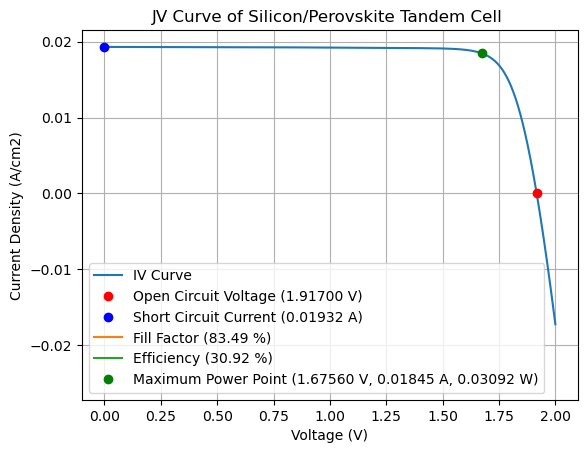

In [415]:
v_oc_index = np.argmin(np.abs(current)) 
v_oc = voltage[v_oc_index]
i_sc_index = np.argmin(np.abs(voltage))
i_sc = current[i_sc_index]
power = voltage * current
mpp_index = np.argmax(power)
v_mpp = voltage[mpp_index]
i_mpp = current[mpp_index]
max_power = power[mpp_index]
efficiency = (max_power/(0.1))*100
fill_factor = (v_mpp * i_mpp) / (v_oc * i_sc)

plt.figure()
plt.plot(voltage, current, label='IV Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (A/cm2)')
plt.title('JV Curve of Silicon/Perovskite Tandem Cell ')
plt.grid()


plt.plot(v_oc, 0, 'ro', label=f'Open Circuit Voltage ({v_oc:.5f} V)')
plt.plot(0, i_sc, 'bo', label=f'Short Circuit Current ({i_sc:.5f} A)')
plt.plot(0, -0.025, label=f'Fill Factor ({fill_factor*100:.2f} %)')
plt.plot(0, -0.02, label=f'Efficiency ({efficiency:.2f} %)')
plt.plot(v_mpp, i_mpp, 'go', label=f'Maximum Power Point ({v_mpp:.5f} V, {i_mpp:.5f} A, {max_power:.5f} W)')
plt.legend()
plt.show()